# Part 1.1 Exploratory Data Analysis (Vietnamese)

## EDA on Vietnamese Dataset

In [1]:
from collections import Counter

from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
ds_viet = load_dataset("uitnlp/vietnamese_students_feedback")

print(ds_viet)
print(ds_viet["train"].features)
print(ds_viet["train"][0])

DatasetDict({
    train: Dataset({
        features: ['sentence', 'sentiment', 'topic'],
        num_rows: 11426
    })
    validation: Dataset({
        features: ['sentence', 'sentiment', 'topic'],
        num_rows: 1583
    })
    test: Dataset({
        features: ['sentence', 'sentiment', 'topic'],
        num_rows: 3166
    })
})
{'sentence': Value(dtype='string', id=None), 'sentiment': ClassLabel(names=['negative', 'neutral', 'positive'], id=None), 'topic': ClassLabel(names=['lecturer', 'training_program', 'facility', 'others'], id=None)}
{'sentence': 'slide giáo trình đầy đủ .', 'sentiment': 2, 'topic': 1}


In [3]:

# some basic analysis
print("Total # of samples:", len(ds_viet["train"]))
print("-" * 20)

sentiment_counts_viet = pd.Series(ds_viet["train"]["sentiment"]).value_counts()
print("Sentiment counts:")
print(sentiment_counts_viet)
print("-" * 20)

topic_counts_viet = pd.Series(ds_viet["train"]["topic"]).value_counts()
print("Topic counts:")
print(topic_counts_viet)
print("-" * 20)

df_viet = pd.DataFrame(ds_viet["train"])
print("Vietnamese duplicates:", df_viet.duplicated().sum())
print("Vietnamese missing sentiments/topics:", df_viet.isna().sum())

Total # of samples: 11426
--------------------
Sentiment counts:
2    5643
0    5325
1     458
Name: count, dtype: int64
--------------------
Topic counts:
0    8166
1    2201
3     562
2     497
Name: count, dtype: int64
--------------------
Vietnamese duplicates: 0
Vietnamese missing sentiments/topics: sentence     0
sentiment    0
topic        0
dtype: int64


In [4]:
print(type(df_viet["sentiment"].iloc[0]))
print("Unique sentiment values:", df_viet["sentiment"].unique())
print("Unique topic values:", df_viet["topic"].unique())

 
 # mapping the numeric labels of sentiment and topic to their string representations
sentiment_mapping = {0: "negative", 1: "neutral", 2: "positive"}
topic_mapping = {0: "lecturer", 1: "training_program", 2: "facility", 3: "others"}

df_viet["sentiment"] = df_viet["sentiment"].map(sentiment_mapping)
df_viet["topic"] = df_viet["topic"].map(topic_mapping)

# check data after cleaning
print("After mapping:")
print(df_viet["sentiment"].value_counts())
print(df_viet["topic"].value_counts())

#check for NaNs
print("NaNs in sentiment:", df_viet["sentiment"].isna().sum())
print("NaNs in topic:", df_viet["topic"].isna().sum())
print("NaNs in sentence:", df_viet["sentence"].isna().sum())


<class 'numpy.int64'>
Unique sentiment values: [2 0 1]
Unique topic values: [1 0 3 2]
After mapping:
sentiment
positive    5643
negative    5325
neutral      458
Name: count, dtype: int64
topic
lecturer            8166
training_program    2201
others               562
facility             497
Name: count, dtype: int64
NaNs in sentiment: 0
NaNs in topic: 0
NaNs in sentence: 0


Categorical summaries:
       sentiment     topic
count      11426     11426
unique         3         4
top     positive  lecturer
freq        5643      8166

Text‐length descriptive statistics:
count    11426.000000
mean        59.084894
std         43.085202
min          4.000000
25%         31.000000
50%         47.000000
75%         73.000000
max        660.000000
Name: length, dtype: float64


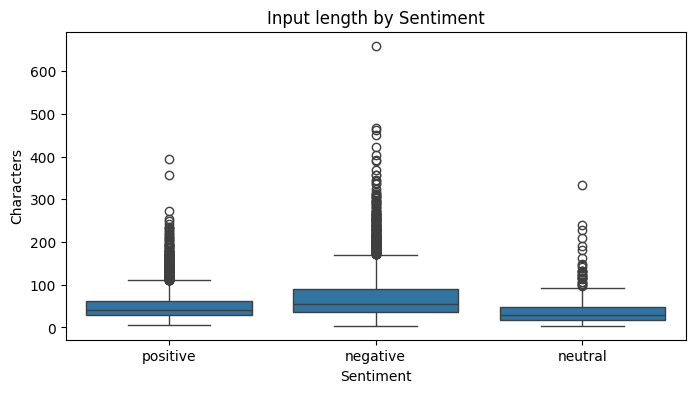

In [5]:
# standard descriptive statistics
print("Categorical summaries:")
print(df_viet[["sentiment", "topic"]].describe())

# Numeric summary on text length
df_viet["length"] = df_viet["sentence"].str.len()
print("\nText‐length descriptive statistics:")
print(df_viet["length"].describe())

# Visualize length by sentiment
plt.figure(figsize=(8,4))
sns.boxplot(x="sentiment", y="length", data=df_viet)
plt.title("Input length by Sentiment")
plt.ylabel("Characters"); plt.xlabel("Sentiment")
plt.show()


In [6]:

# Text length analysis for Vietnamese dataset
viet_text_lengths = [len(text) for text in ds_viet["train"]["sentence"]]
print("\nVietnamese text length stats:")
print(pd.Series(viet_text_lengths).describe())

short_threshold_viet = 10
long_threshold_viet = 400
print("\nPotential outliers in Vietnamese dataset:")
print(f"Very short texts (<{short_threshold_viet} chars): {sum(1 for l in viet_text_lengths if l < short_threshold_viet)}")
print(f"Very long texts (>{long_threshold_viet} chars): {sum(1 for l in viet_text_lengths if l > long_threshold_viet)}")



Vietnamese text length stats:
count    11426.000000
mean        59.084894
std         43.085202
min          4.000000
25%         31.000000
50%         47.000000
75%         73.000000
max        660.000000
dtype: float64

Potential outliers in Vietnamese dataset:
Very short texts (<10 chars): 64
Very long texts (>400 chars): 6


In [7]:
# word count analysis
df_viet["word_count"] = df_viet["sentence"].str.split().apply(len)
print("\nWord count descriptive statistics:")
print(df_viet["word_count"].describe())



Word count descriptive statistics:
count    11426.000000
mean        14.308769
std         10.089727
min          2.000000
25%          8.000000
50%         11.000000
75%         17.000000
max        159.000000
Name: word_count, dtype: float64


In [8]:
df_viet.head()

,sentence,sentiment,topic,length,word_count
0,slide giáo trình đầy đủ .,positive,training_program,25,6
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",positive,lecturer,46,11
2,đi học đầy đủ full điểm chuyên cần .,negative,training_program,36,9
3,chưa áp dụng công nghệ thông tin và các thiết ...,negative,lecturer,76,18
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",positive,lecturer,59,15


In [9]:
from pyvi import ViTokenizer
import re

# Define Vietnamese stopwords directly without depending on a library
viet_stopwords = set([
    "và", "là", "của", "có", "được", "trong", "đã", "cho", "các", "như",
    "những", "một", "với", "không", "này", "để", "về", "có thể", "từ", "đến",
    "theo", "tại", "nhưng", "bị", "do", "khi", "nên", "sẽ", "vì", "tôi",
    "bạn", "anh", "chị", "từng", "đó", "thì", "đều", "mà", "trên", "rất", "mình"
])

# First tokenize with ViTokenizer to identify proper word boundaries
df_viet["tokenized"] = df_viet["sentence"].apply(ViTokenizer.tokenize)

# Then preprocess while keeping Vietnamese characters intact
def preprocess_viet_text_improved(text):
    # Convert to lowercase
    text = text.lower()
    
    #remove punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation except underscores
    
    # Remove stopwords (words are joined with underscore by ViTokenizer)
    words = text.split()
    filtered = [w for w in words if w not in viet_stopwords]
    return " ".join(filtered)

df_viet["sentence_cleaned"] = df_viet["tokenized"].apply(preprocess_viet_text_improved)


In [10]:
df_viet.head()

,sentence,sentiment,topic,length,word_count,tokenized,sentence_cleaned
0,slide giáo trình đầy đủ .,positive,training_program,25,6,slide giáo_trình đầy_đủ .,slide giáo_trình đầy_đủ
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",positive,lecturer,46,11,"nhiệt_tình giảng_dạy , gần_gũi với sinh_viên .",nhiệt_tình giảng_dạy gần_gũi sinh_viên
2,đi học đầy đủ full điểm chuyên cần .,negative,training_program,36,9,đi học đầy_đủ full điểm chuyên_cần .,đi học đầy_đủ full điểm chuyên_cần
3,chưa áp dụng công nghệ thông tin và các thiết ...,negative,lecturer,76,18,chưa áp_dụng công_nghệ thông_tin và các thiết_...,chưa áp_dụng công_nghệ thông_tin thiết_bị hỗ_t...
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",positive,lecturer,59,15,"thầy giảng bài hay , có nhiều bài_tập ví_dụ ng...",thầy giảng bài hay nhiều bài_tập ví_dụ ngay lớp


In [11]:
# Create a list of words from the tokenized sentences
def corpus_viet(text):
    text_list = text.split()
    return text_list
df_viet["sentence_words_list"] = df_viet["sentence_cleaned"].apply(corpus_viet)
df_viet.head()

,sentence,sentiment,topic,length,word_count,tokenized,sentence_cleaned,sentence_words_list
0,slide giáo trình đầy đủ .,positive,training_program,25,6,slide giáo_trình đầy_đủ .,slide giáo_trình đầy_đủ,"[slide, giáo_trình, đầy_đủ]"
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",positive,lecturer,46,11,"nhiệt_tình giảng_dạy , gần_gũi với sinh_viên .",nhiệt_tình giảng_dạy gần_gũi sinh_viên,"[nhiệt_tình, giảng_dạy, gần_gũi, sinh_viên]"
2,đi học đầy đủ full điểm chuyên cần .,negative,training_program,36,9,đi học đầy_đủ full điểm chuyên_cần .,đi học đầy_đủ full điểm chuyên_cần,"[đi, học, đầy_đủ, full, điểm, chuyên_cần]"
3,chưa áp dụng công nghệ thông tin và các thiết ...,negative,lecturer,76,18,chưa áp_dụng công_nghệ thông_tin và các thiết_...,chưa áp_dụng công_nghệ thông_tin thiết_bị hỗ_t...,"[chưa, áp_dụng, công_nghệ, thông_tin, thiết_bị..."
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",positive,lecturer,59,15,"thầy giảng bài hay , có nhiều bài_tập ví_dụ ng...",thầy giảng bài hay nhiều bài_tập ví_dụ ngay lớp,"[thầy, giảng, bài, hay, nhiều, bài_tập, ví_dụ,..."


In [12]:
from tqdm import trange
corpus_viet = []
df_viet.reset_index(drop=True, inplace=True)

for i in trange(df_viet.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus_viet += df_viet['sentence_cleaned'][i].split()

len(corpus_viet)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 11426/11426 [00:00<00:00, 494460.67it/s]


86381

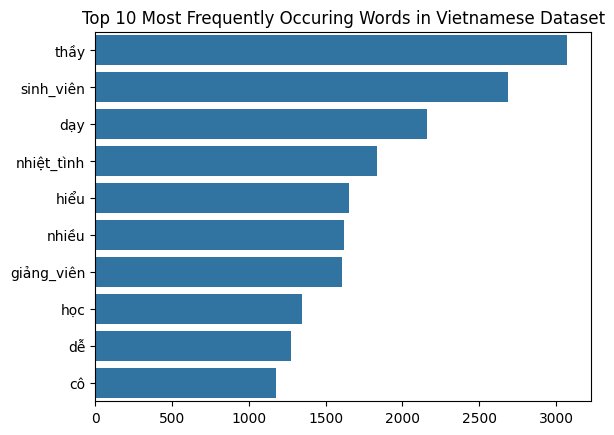

In [13]:
most_common_viet = Counter(corpus_viet).most_common(10)
most_common_viet

viet_word = []
freq_viet = []
for word, count in most_common_viet:
    viet_word.append(word)
    freq_viet.append(count)
    
sns.barplot(x=freq_viet, y=viet_word)
plt.title('Top 10 Most Frequently Occuring Words in Vietnamese Dataset')
plt.show()

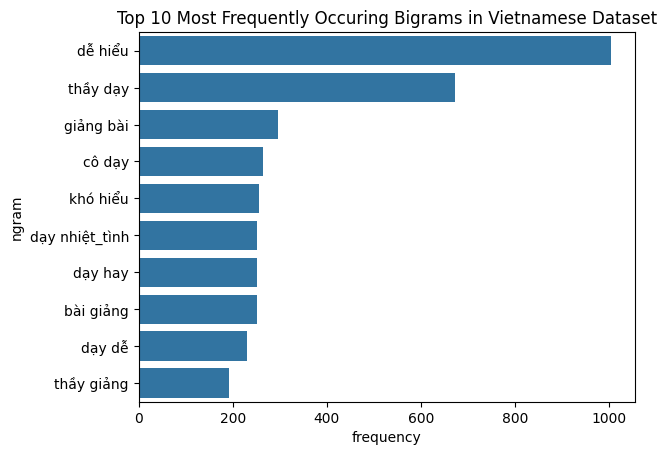

In [14]:
cv_viet = CountVectorizer(ngram_range=(2,2))
bigrams_viet = cv_viet.fit_transform(df_viet['sentence_cleaned'])
count_values_viet = bigrams_viet.toarray().sum(axis=0)
ngram_freq_viet = pd.DataFrame(sorted([(count_values_viet[i], k) for k, i in cv_viet.vocabulary_.items()], reverse=True))
ngram_freq_viet.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq_viet['frequency'][:10], y=ngram_freq_viet['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams in Vietnamese Dataset')
plt.show()



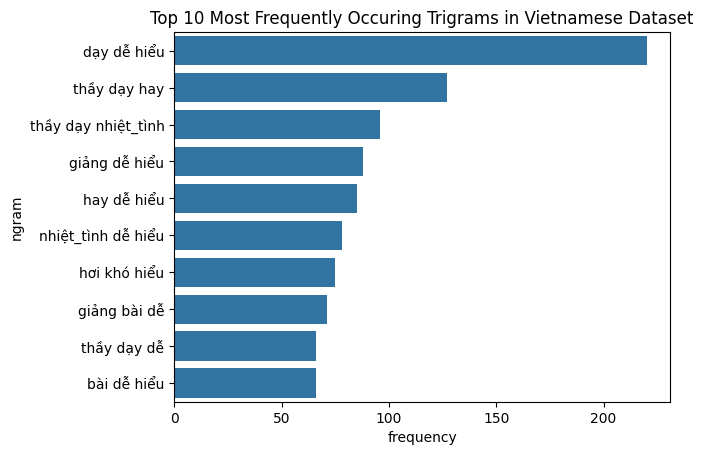

In [15]:
cv1_viet = CountVectorizer(ngram_range=(3,3))
trigrams_viet = cv1_viet.fit_transform(df_viet['sentence_cleaned'])
count_values_viet1 = trigrams_viet.toarray().sum(axis=0)
ngram_freq_viet1 = pd.DataFrame(sorted([(count_values_viet1[i], k) for k, i in cv1_viet.vocabulary_.items()], reverse=True))
ngram_freq_viet1.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq_viet1['frequency'][:10], y=ngram_freq_viet1['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams in Vietnamese Dataset')
plt.show()

In [16]:
short_threshold_viet = 10
long_threshold_viet = 200

negative_normal_sample_viet = df_viet[(df_viet["sentiment"] == "negative") 
                                      & (df_viet["length"].between(short_threshold_viet, long_threshold_viet))].sample(n=1280, random_state=13)
neutral_normal_sample_viet = df_viet[(df_viet["sentiment"] == "neutral")].sample(n=390, random_state=13)
positive_normal_sample_viet = df_viet[(df_viet["sentiment"] == "positive") 
                                      & (df_viet["length"].between(short_threshold_viet, long_threshold_viet))].sample(n=1280, random_state=13)

negative_long_outlier_viet = df_viet[(df_viet["sentiment"] == "negative") 
                                     & (df_viet["length"] > long_threshold_viet)].sample(n=10, random_state=13)
positive_long_outlier_viet = df_viet[(df_viet["sentiment"] == "positive") 
                                     & (df_viet["length"] > long_threshold_viet)].sample(n=10, random_state=13)

negative_short_outlier_viet = df_viet[(df_viet["sentiment"] == "negative") 
                                      & (df_viet["length"] < short_threshold_viet)].sample(n=10, random_state=13)
neutral_short_outlier_viet = df_viet[(df_viet["sentiment"] == "neutral") 
                                     & (df_viet["length"] < short_threshold_viet)].sample(n=10, random_state=13)
positive_short_outlier_viet = df_viet[(df_viet["sentiment"] == "positive") 
                                      & (df_viet["length"] < short_threshold_viet)].sample(n=10, random_state=13)

# combine all samples
train_samples_viet = pd.concat([
    negative_normal_sample_viet,
    neutral_normal_sample_viet,
    positive_normal_sample_viet,
    negative_long_outlier_viet,
    positive_long_outlier_viet,
    negative_short_outlier_viet,
    neutral_short_outlier_viet,
    positive_short_outlier_viet
])

#shuffle the training samples
train_samples_viet = train_samples_viet.sample(frac=1, random_state=13).reset_index(drop=True)

# save the training samples to a CSV file
train_samples_viet.to_csv("data/vietnamese_train_samples.csv", index=False, encoding="utf-8-sig")


In [22]:
# choose another 250 for validation

training_indices_viet = train_samples_viet.index.tolist()

remaining_samples_viet = df_viet[~df_viet.index.isin(training_indices_viet)]

negative_normal_val_viet = remaining_samples_viet[(remaining_samples_viet["sentiment"] == "negative") 
                                                  & (remaining_samples_viet["length"].between(short_threshold_viet, long_threshold_viet))].sample(n=77, random_state=13)
neutral_normal_val_viet = remaining_samples_viet[(remaining_samples_viet["sentiment"] == "neutral") 
                                                 & (remaining_samples_viet["length"].between(short_threshold_viet, long_threshold_viet))].sample(n=78, random_state=13)
positive_normal_val_viet = remaining_samples_viet[(remaining_samples_viet["sentiment"] == "positive") 
                                                  & (remaining_samples_viet["length"].between(short_threshold_viet, long_threshold_viet))].sample(n=77, random_state=13)

negative_short_val_viet = remaining_samples_viet[(remaining_samples_viet["sentiment"] == "negative") 
                                                 & (remaining_samples_viet["length"] < short_threshold_viet)].sample(n=3, random_state=13)
neutral_short_val_viet = remaining_samples_viet[(remaining_samples_viet["sentiment"] == "neutral") 
                                                & (remaining_samples_viet["length"] < short_threshold_viet)].sample(n=3, random_state=13)
positive_short_val_viet = remaining_samples_viet[(remaining_samples_viet["sentiment"] == "positive") 
                                                 & (remaining_samples_viet["length"] < short_threshold_viet)].sample(n=3, random_state=13)

negative_long_val_viet = remaining_samples_viet[(remaining_samples_viet["sentiment"] == "negative") 
                                                & (remaining_samples_viet["length"] > long_threshold_viet)].sample(n=3, random_state=13)
neutral_long_val_viet = remaining_samples_viet[(remaining_samples_viet["sentiment"] == "neutral") 
                                               & (remaining_samples_viet["length"] > long_threshold_viet)].sample(n=3, random_state=13)
positive_long_val_viet = remaining_samples_viet[(remaining_samples_viet["sentiment"] == "positive") 
                                                & (remaining_samples_viet["length"] > long_threshold_viet)].sample(n=3, random_state=13)

In [23]:
validation_samples_viet = pd.concat([
    negative_normal_val_viet,
    neutral_normal_val_viet,
    positive_normal_val_viet,
    negative_short_val_viet,
    neutral_short_val_viet,
    positive_short_val_viet,
    negative_long_val_viet,
    neutral_long_val_viet,
    positive_long_val_viet
])

# shuffle the validation samples
validation_samples_viet = validation_samples_viet.sample(frac=1, random_state=13).reset_index(drop=True)

# verify distribution
print("Total validation samples: ", len(validation_samples_viet))

validation_samples_viet.to_csv("data/vietnamese_validation_samples.csv", index=False, encoding='utf-8-sig')


Total validation samples:  250
